In [2]:
import pandas as pd # to read a csv files 
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # cientific performance 

In [38]:
listing = pd.read_csv("Airbnb_NYC_2019.csv")
listing.head(10) #our dataset [48895 rows x 16 columns]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [47]:
# DataFrame info 
#missing_info = listing.isnull().count() # there is not null on this data bec the #of rows are same as dataFrame
listing.groupby("neighbourhood_group").count() #group by neighnours 

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


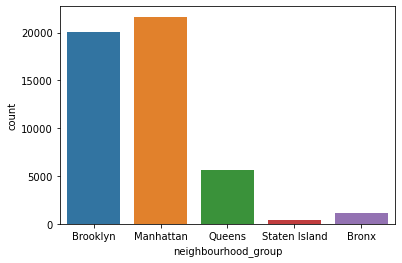

In [45]:
#Create a plot by grouping by 5 neighbourhoods 
sn.countplot(x="neighbourhood_group", data=listing)#use seaboarn with count() group the neighbours & plot in a bar
#sn.countplot(x= "room_type", data = listing) # there are 3 type of rooms where the entire house gets the hihest count
plt.show()

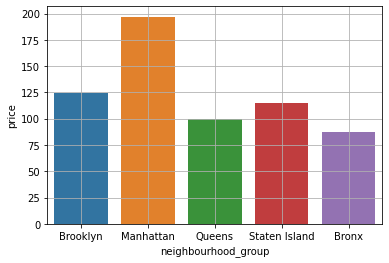

In [50]:
#Create a bar chart with seaborn using neighbourhood by group vs prices using the dataFrame
sn.barplot(x="neighbourhood_group", y="price", data=listing, ci = False) #average prices are 100 ~ 115, but Manhattan 200>
plt.grid()
# ci = confident interval is the black line on the barplot, add ", ci = False" to remove it 

Text(0.5, 1.0, 'Hosting vs Neighbourhoods')

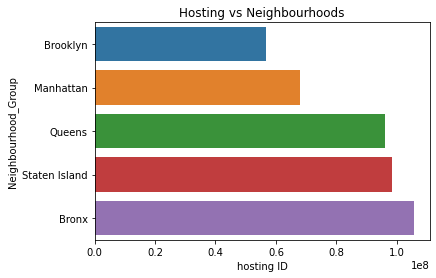

In [56]:
#sn.barplot(x= "neighbourhood_group", y = "host_id", data = listing, ci = False) 
sn.barplot(x= "host_id", y = "neighbourhood_group", data = listing, ci = False) 
plt.xlabel("hosting ID")
plt.ylabel("Neighbourhood_Group")
plt.title("Hosting vs Neighbourhoods")

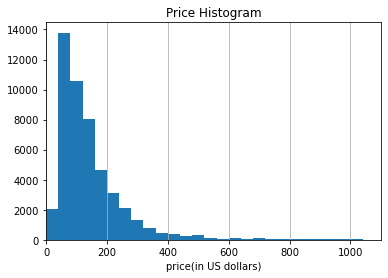

In [70]:
plt.hist(listing["price"], bins = np.arange(0,1100, 40)) # 0 = left, 1100= right 40 = width of each bin
plt.grid(axis="x", alpha =1)
plt.xlabel("price(in US dollars)")
plt.title("Price Histogram")
plt.xlim(0,1100)
plt.show()

In [25]:
# Design Hypothesis

In [73]:
reviews = listing.loc[listing["number_of_reviews"] == True]
noreviews = listing.loc[listing["number_of_reviews"] == False]

In [ ]:
observed_test_stat = np.mean()

In [75]:
sn.distplot(reviews["price"], kde = False, title = "Reviews vs Price")
plt.legend()
plt.show()

TypeError: distplot() got an unexpected keyword argument 'title'

In [ ]:
# usisng numpy use data efficiently on Histogram 

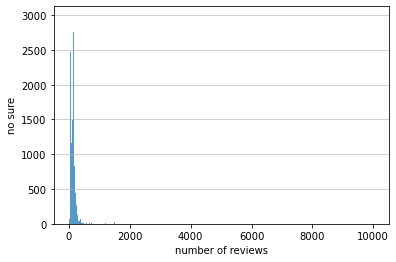

In [75]:
plt.hist(listing["price"], bins="auto", alpha=0.75, rwidth=10)
plt.grid(axis="y", alpha = .75)
plt.xlabel("number of reviews")
plt.ylabel("no sure")
plt.show()

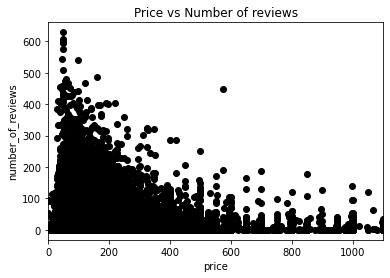

In [85]:
plt.scatter(x = listing["price"], y = listing["number_of_reviews"], color = "black")
plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.title("Price vs Number of reviews")
plt.xlim(0,1100)
plt.show()

In [ ]:
# is there any relation ship betw 

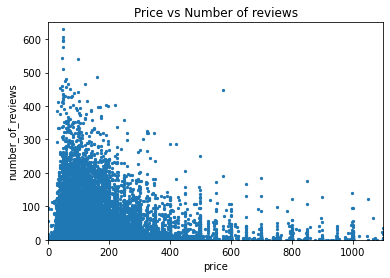

In [93]:
plt.scatter(x = listing["price"], y = listing["number_of_reviews"], s = 5) ##s make the scatter smaller
plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.title("Price vs Number of reviews")
plt.xlim(0,1100)
plt.ylim(0,700)
plt.show()

In [ ]:
#design a Hypothesis Test between Num of reviews and not reviews at all 

In [1]:
list(listing.column.values)

NameError: name 'listing' is not defined